# Solution of the 2D Poisson problem using our own FEM code

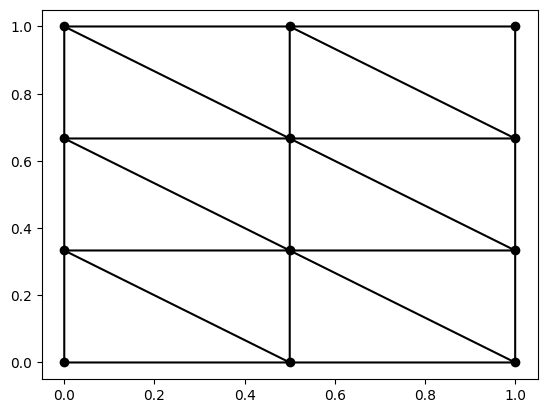

[[ 0  1  3]
 [ 3  4  6]
 [ 6  7  9]
 [ 1  2  4]
 [ 4  5  7]
 [ 7  8 10]
 [ 1  4  3]
 [ 4  7  6]
 [ 7 10  9]
 [ 2  5  4]
 [ 5  8  7]
 [ 8 11 10]]


In [3]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import *
mesh = StructuredRectangleMesh(2, 3)
DrawMesh2D(mesh)
print(mesh.faces)

On the mesh, we define a finite element space:

In [3]:
from methodsnm.fes import *
fes = P1_Triangle_Space(mesh)

On the mesh, with the given finite element space, we define the variational formulation:
$$
\int_{\Omega} \nabla u \cdot \nabla v dx + \int_{\Omega} u v dx = \int_{\Omega} f v dx
$$
Replacing 
* $u \leadsto u_h = \sum_j u_j \phi_j $ and
* $v \leadsto v_h = \phi_i$
we obtain a linear system:

In [4]:
from methodsnm.forms import *
from methodsnm.formint import *
from numpy import pi, cos

blf = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf += LaplaceIntegral(c)
blf += MassIntegral(c)
blf.assemble()

lf = LinearForm(fes)
f = GlobalFunction(lambda x: (1 + pi**2) * cos(pi*x[0]), mesh = mesh)
lf += SourceIntegral(f)
lf.assemble()

blf.matrix

In [5]:
print(blf.matrix, "\n", lf.vector)

  (0, 0)	1.0008333398518834
  (0, 1)	-0.49958333558253515
  (0, 11)	-0.4995833357098663
  (1, 0)	-0.49958333558253515
  (1, 1)	2.002500011016954
  (1, 2)	-0.49958333558253515
  (1, 11)	0.0008333333333333335
  (1, 12)	-0.9991666712924016
  (2, 1)	-0.49958333558253515
  (2, 2)	2.002500011016953
  (2, 3)	-0.49958333558253504
  (2, 12)	0.0008333333333333335
  (2, 13)	-0.9991666712924011
  (3, 2)	-0.49958333558253504
  (3, 3)	2.002500011016953
  (3, 4)	-0.4995833355825348
  (3, 13)	0.0008333333333333328
  (3, 14)	-0.9991666712924011
  (4, 3)	-0.4995833355825348
  (4, 4)	2.002500011016953
  (4, 5)	-0.49958333558253504
  (4, 14)	0.0008333333333333335
  (4, 15)	-0.9991666712924009
  (5, 4)	-0.49958333558253504
  (5, 5)	2.0025000110169526
  :	:
  (115, 115)	2.002500005465838
  (115, 116)	-0.4995833346997928
  (116, 105)	-0.9991666712924011
  (116, 106)	0.0008333333333333328
  (116, 115)	-0.4995833346997928
  (116, 116)	2.002500005465838
  (116, 117)	-0.4995833346997928
  (117, 106)	-0.999166671

Next, we solve the linear system. And we use a direct solver from scipy for that (for now):

In [6]:
uh = FEFunction(fes)
from scipy.sparse.linalg import spsolve
uh.vector = spsolve(blf.matrix, lf.vector)

Finally, we can visualize the solution:

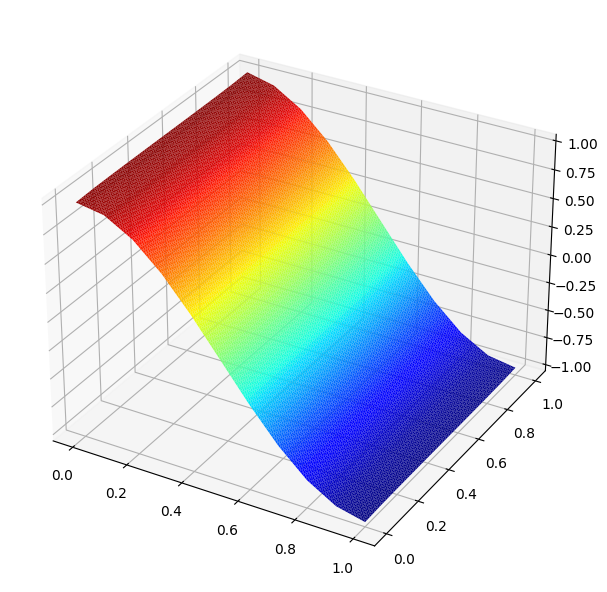

In [7]:
DrawFunction2D(uh)

This problem now contained several simplifications, that can be removed step by step:
 * qualitative evaluation only (no quantitative evaluation, no convergence study)
 * boundary conditions are natural. Different boundary conditions make it more difficult
 * 1D $\leadsto$ 2D
 * P1 (low order) discretization vs. P2 and higher order discretizations

In [8]:
from methodsnm.forms import compute_difference_L2

uex =  GlobalFunction(lambda x: cos(pi*x[0]), mesh = mesh)
l2diff = compute_difference_L2(uh, uex, mesh, intorder = 6)

print("l2diff =", l2diff)

l2diff = 0.006129571367563993
